<a href="https://colab.research.google.com/github/sandrarojo/imageclassificationANN/blob/master/AAN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation and set up

In [2]:
#Installing packages

! pip install -q tensorflow-gpu


     |████████████████████████████████| 320.4MB 31kB/s 


In [3]:
import tensorflow as tf


In [4]:
print(tf.__version__)

2.3.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data preprocessing

In [6]:
# Import data set

from tensorflow.keras.datasets import fashion_mnist

In [7]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [14]:
np.max(x_train), np.min(x_train), np.mean(x_train)


(255, 0, 72.94035223214286)

In [15]:
np.max(y_train), np.min(y_train)

(9, 0)

In [16]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


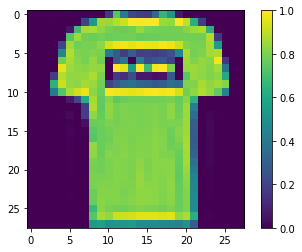

In [22]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [19]:
y_train[1]

0

In [20]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

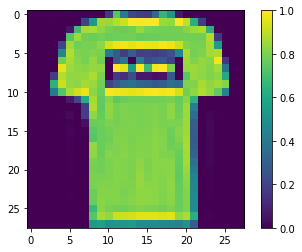

In [21]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [23]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [25]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# 3. Building model


In [26]:
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

In [27]:
# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [28]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [29]:
# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# 4. Training of the model

In [30]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Training the model
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5561 - sparse_categorical_accuracy: 0.8032
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4215 - sparse_categorical_accuracy: 0.8471
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8586
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3678 - sparse_categorical_accuracy: 0.8635
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3533 - sparse_categorical_accuracy: 0.8709
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3417 - sparse_categorical_accuracy: 0.8736
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3321 - sparse_categorical_accuracy: 0.8782
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3222 - sparse_categorical_accuracy: 0.8795
Epoch 9/10
1875/1875 [==========

# Model evaluation

In [33]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3445 - sparse_categorical_accuracy: 0.8765


In [34]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8765000104904175


In [37]:
# Model prediction
y_pred = model.predict_classes(x_test)

In [38]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [39]:
y_pred[110],  y_test[110] # predicted and actual output

(2, 2)

In [40]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [41]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[791   5  23  41   7   0 120   0  13   0]
 [  1 971   0  21   2   0   3   0   2   0]
 [ 14   1 803  10 135   1  34   0   2   0]
 [ 11   8  12 898  35   0  31   0   5   0]
 [  0   1  91  35 848   0  25   0   0   0]
 [  0   0   0   0   0 958   0  23   1  18]
 [104   2 139  39 108   0 597   0  11   0]
 [  0   0   0   0   0  10   0 961   1  28]
 [  3   1   3   6   3   2   2   4 976   0]
 [  1   0   0   0   0   4   0  33   0 962]]


In [44]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8765
